In [1]:
from appgeopy import *
from my_packages import *

In [2]:
filepath = r"20240923_GPS_Leveling_Compare_1000m.xlsx"
buffer_radius = filepath.split(".")[0].split("_")[-1]
folder2savefigure = os.getcwd()
df = pd.read_excel(filepath)
df = df.sort_values(by="STATION")
df.head(5)

,STATION,GPS(mm/year),Leveling(mm/year)
85,BDES,-14.808105,-23.659407
84,BDES,-14.808105,-23.744379
82,BDES,-14.808105,-24.110482
100,BDES,-16.535194,-19.727398
103,BDES,-15.861072,-16.696463


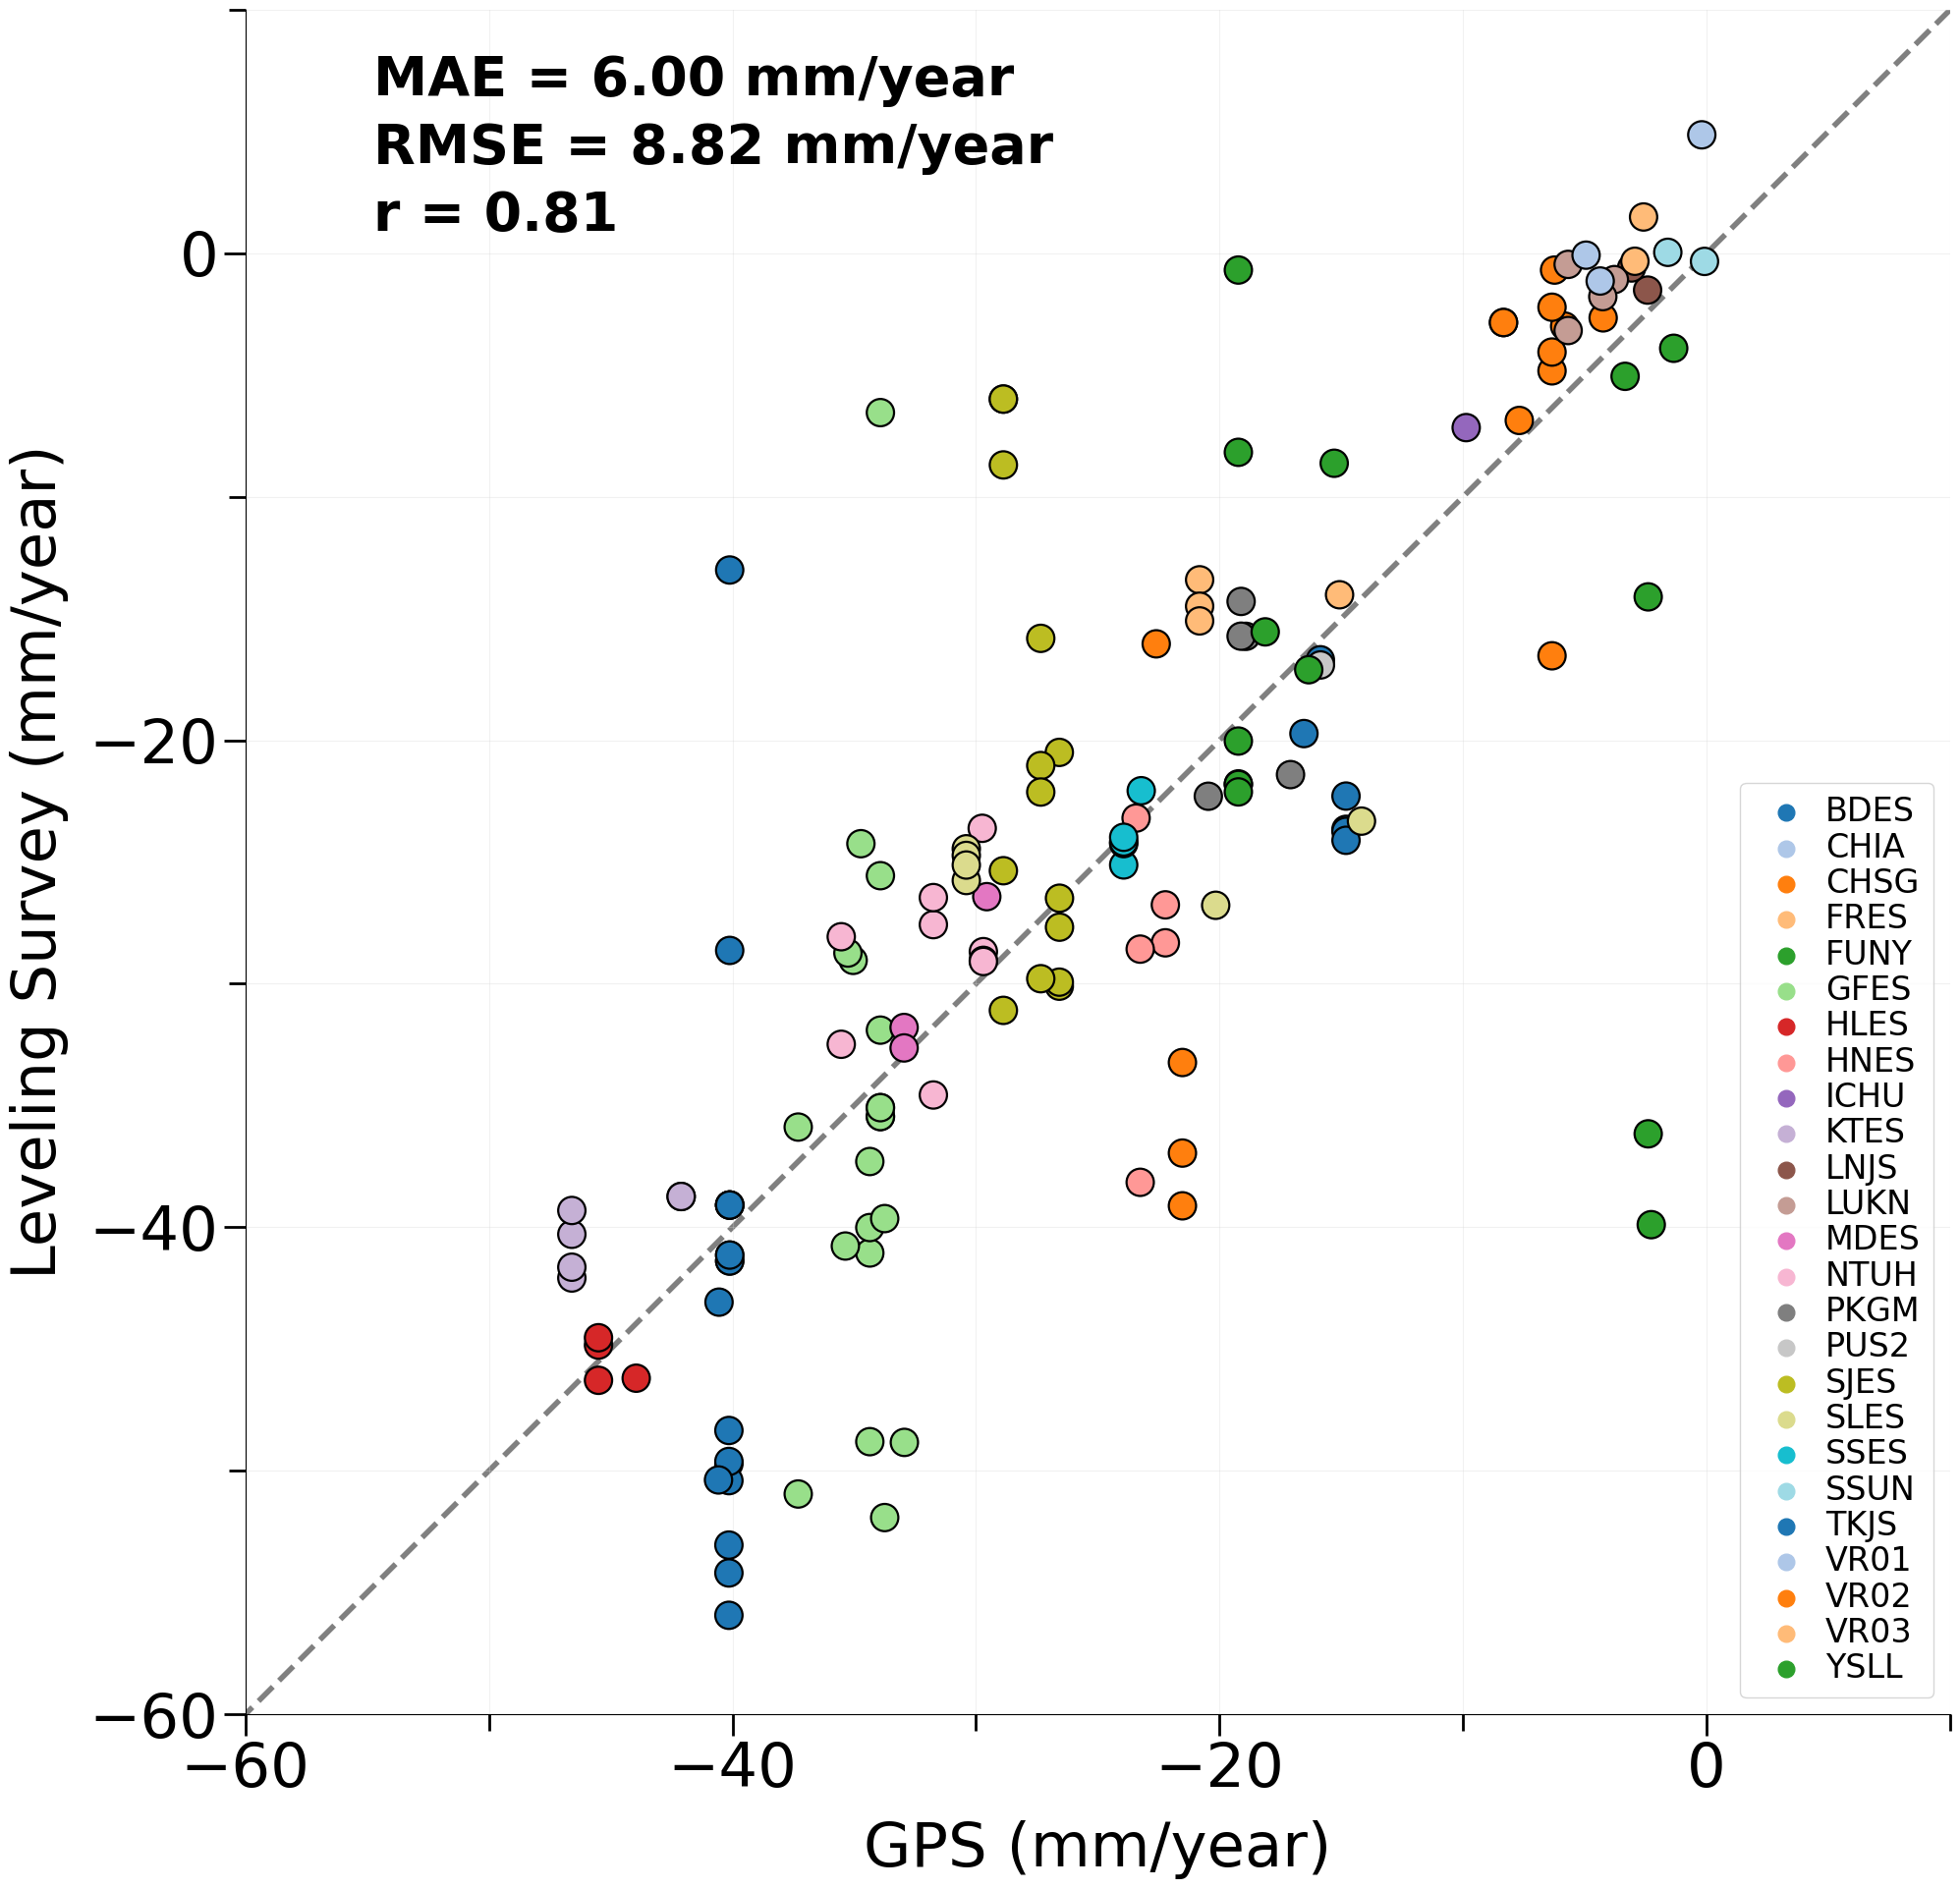

In [3]:
cm = 1 / 2.54
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1)
ax.grid(axis="both", which="both", color="lightgrey", alpha=0.3)
top_thres = 10
bot_thres = -60

x1, y1 = [top_thres, bot_thres], [top_thres, bot_thres]
ax.plot(x1, y1, linestyle="--", color="gray", linewidth=4, zorder=1)

ax.set_xlim(bot_thres, top_thres)
ax.set_ylim(bot_thres, top_thres)

ax.set_aspect(aspect="equal", adjustable="box")

# scatter_points = [(psc, lev) for psc, lev in zip(df["GPS(mm/year)"], df["Leveling(mm/year)"])]

# scatter_plot = ax.scatter(
#     *zip(*scatter_points), s=400, facecolors="none", edgecolors="black", marker="o"
# )

# Creating a scatter plot using Seaborn for added color and styling
sns.scatterplot(
    data=df,
    x="GPS(mm/year)",
    y="Leveling(mm/year)",
    hue="STATION",
    palette="tab20",
    s=400,
    edgecolor="black",
    zorder=2,
    ax=ax,
)


x = df["GPS(mm/year)"]
y = df["Leveling(mm/year)"]

ax.set_xlabel("GPS (mm/year)", fontsize=45, labelpad=15)
ax.set_ylabel("Leveling Survey (mm/year)", fontsize=45, labelpad=15)

mean_abs_err = np.mean(np.abs(x - y))
rmse = np.sqrt(np.mean((x - y) ** 2))
m, c, r, p, se1 = stats.linregress(x, y)

major_base = 20
minor_base = 10

x_major_loc = plticker.MultipleLocator(base=major_base)
x_minor_loc = plticker.MultipleLocator(base=minor_base)
ax.xaxis.set_major_locator(x_major_loc)
ax.xaxis.set_minor_locator(x_minor_loc)

y_major_loc = plticker.MultipleLocator(base=major_base)
y_minor_loc = plticker.MultipleLocator(base=minor_base)
ax.yaxis.set_major_locator(y_major_loc)
ax.yaxis.set_minor_locator(y_minor_loc)

ax.tick_params(axis="y", which="major", labelsize=45, direction="out", length=16, width=2)
ax.tick_params(axis="y", which="minor", labelsize=45, direction="out", length=12, width=2)

ax.tick_params(axis="x", which="major", labelsize=45, direction="out", length=16, width=2)
ax.tick_params(axis="x", which="minor", labelsize=45, direction="out", length=12, width=2)

ax.text(
    0.075,
    0.95,
    f"MAE = {mean_abs_err:.2f} mm/year",
    transform=plt.gca().transAxes,
    fontweight="bold",
    fontsize=40,
)
ax.text(
    0.075,
    0.91,
    f"RMSE = {rmse:.2f} mm/year",
    transform=plt.gca().transAxes,
    fontweight="bold",
    fontsize=40,
)

ax.text(
    0.075,
    0.87,
    f"r = {r:.2f}",
    transform=plt.gca().transAxes,
    fontweight="bold",
    fontsize=40,
)

ax.spines[["right", "top"]].set_visible(False)

ax.legend(
    fontsize=24,
    frameon=True,
    labelspacing=0.1,
    handletextpad=0.2,
    loc='lower right',
    markerscale=2,
)

fig.tight_layout()

base = f"GPS_Leveling_AvgVelo_{buffer_radius}"

for i in range(1, 1001):
    savename = os.path.join(folder2savefigure, base + "_{}.png".format(str(i).zfill(3)))
    if os.path.exists(savename):
        continue
    else:
        break

plt.savefig(
    savename,
    dpi=600,
    transparent=False,
    facecolor="w",
    edgecolor="w",
    bbox_inches="tight",
)
# plt.close()
plt.show()